In [1]:
import sys 
import os 
import numpy as np
import pandas as pd
import sklearn as sk
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn import metrics as metrics_sk
from sklearn.metrics import precision_recall_curve
from scipy.stats import ks_2samp
from IPython.display import Image, display_svg, SVG

In [2]:
from keras import layers, Sequential
from keras.layers import Input, Add, Dropout, Dense, Activation, ZeroPadding1D, ZeroPadding2D, BatchNormalization, Flatten, Conv1D, AveragePooling1D, MaxPooling1D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras import metrics
from keras import optimizers
from keras import regularizers
import pydot
from tensorflow.keras import regularizers
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
import tensorflow as tf
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

Using TensorFlow backend.
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflo

In [3]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [4]:
from keras.backend import log
def inv_h_sin(x, theta = 1):
    if x == 0:
        return x
    else:
        return log(theta*x + ((theta*x)**2 + 1)**0.5)/theta

In [5]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})
get_custom_objects().update({'inv_h_sin': Activation(inv_h_sin)})

In [6]:
os.getcwd()

'C:\\Users\\Benedito'

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
os.chdir("C:/Users/Benedito/Desktop/MECAI/Introdução a Estatistica/MVP")

In [9]:
os.getcwd()

'C:\\Users\\Benedito\\Desktop\\MECAI\\Introdução a Estatistica\\MVP'

In [10]:
df = pd.read_csv("modelling_table_7.csv")

In [11]:
data = df

In [12]:
data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,mean_knn_target,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CODE_GENDER_M,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Higher education,NAME_FAMILY_STATUS_Married,OCCUPATION_TYPE_Sales staff,MAX(previous.NFLAG_LAST_APPL_IN_DAY),FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY_2,FLAG_OWN_CAR_Y,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Lower secondary,MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL),delinquency_12_24_mths_microloan_bureau,FLAG_DOCUMENT_13,WALLSMATERIAL_MODE_Monolithic,FLAG_PHONE,NAME_INCOME_TYPE_State servant,NAME_TYPE_SUITE_Other_A,REG_REGION_NOT_WORK_REGION,delinquency_6_12_mths_microloan_bureau,FLAG_WORK_PHONE,NAME_TYPE_SUITE_Family,FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Group of people,CODE_GENDER_XNA,NAME_INCOME_TYPE_Student,credit_income_cluster_4,YEARS_BEGINEXPLUATATION_MEDI,NAME_HOUSING_TYPE_Office apartment,"WALLSMATERIAL_MODE_Stone, brick",amt_credit_sum_overdue_microloan_bureau,WALLSMATERIAL_MODE_Panel,credit_income_ratio_monotonic,remaining_pmts_monotonic,missing_rate_monotonic,days_phone_change_over_gap_amt_installment_monotonic,YEARS_BUILD_MODE_monotonic,ENTRANCES_AVG_monotonic,DAYS_ID_PUBLISH_monotonic,FLOORSMIN_AVG_monotonic,APARTMENTS_MEDI_monotonic,LIVINGAREA_MODE_monotonic,YEARS_BEGINEXPLUATATION_AVG_monotonic,income_over_credit_monotonic,days_phone_change_times_gap_days_installment_monotonic,FLOORSMIN_MEDI_monotonic,OWN_CAR_AGE_monotonic,AMT_GOODS_PRICE_monotonic,DAYS_REGISTRATION_monotonic,FLOORSMIN_MODE_monotonic,FLOORSMAX_AVG_monotonic,LANDAREA_AVG_transformed,LANDAREA_MEDI_transformed,cnt_appl_previous_transformed,MAX(previous.DAYS_DECISION)_transformed,MAX(previous.HOUR_APPR_PROCESS_START)_transformed,MEAN(previous.NFLAG_LAST_APPL_IN_DAY)_transformed,MIN(previous.HOUR_APPR_PROCESS_START)_transformed,MEAN(previous.AMT_CREDIT)_transformed,avg_amt_application_previous_transformed,SUM(previous.AMT_GOODS_PRICE)_transformed,SUM(previous.DAYS_FIRST_DRAWING)_transformed,MAX(previous.DAYS_FIRST_DRAWING)_transformed,SUM(previous.DAYS_TERMINATION)_transformed,SUM(previous.DAYS_FIRST_DUE)_transformed,MEAN(previous.DAYS_TERMINATION)_transformed,MEAN(previous.DAYS_LAST_DUE_1ST_VERSION)_transformed,SUM(previous.CNT_PAYMENT)_transformed,MAX(previous.CNT_PAYMENT)_transformed,max_cnt_payment_previous_transformed,avg_pos_cash_cnt_installment_previous_transformed,avg_pos_cash_cnt_installment_future_previous_transformed,MEDIAN(previous.CNT_PAYMENT)_transformed,MEDIAN(previous.AMT_CREDIT)_transformed,MEDIAN(previous.AMT_APPLICATION)_transformed,gap_avg_application_credit_previous_transformed,COUNT(bureau)_transformed,MIN(bureau.DAYS_CREDIT)_transformed,MEDIAN(bureau.DAYS_CREDIT_UPDATE)_transformed,MAX(bureau.DAYS_CREDIT_UPDATE)_transformed,MEAN(bureau.AMT_CREDIT_SUM)_transformed,SUM(bureau.DAYS_CREDIT_ENDDATE)_transformed,MIN(bureau.DAYS_CREDIT_ENDDATE)_transformed,NONLIVINGAREA_MEDI_transformed,STD(previous.AMT_CREDIT)_transformed,MEAN(bureau.DAYS_ENDDATE_FACT)_transformed,STD(bureau.DAYS_CREDIT)_transformed,STD(previous.AMT_GOODS_PRICE)_transformed,cnt_contracts_bureau_transformed,STD(previous.CNT_PAYMENT)_transformed,amt_paid_down_transformed,SUM(previous.RATE_DOWN_PAYMENT)_transformed,MEAN(previous.AMT_DOWN_PAYMENT)_transformed,MAX(previous.AMT_DOWN_PAYMENT)_transformed,MIN(previous.CNT_PAYMENT)_transformed,SKEW(previous.AMT_APPLICATION)_transformed,SKEW(bureau.DAYS_CREDIT)_transformed,SKEW(previous.DAYS_DECISION)_transformed,SUM(bureau.AMT_CREDIT_SUM_DEBT)_transformed,tot_debt_lim_ratio_transformed,MAX(bureau.AMT_CREDIT_SUM_DEBT)_transformed,cnt_seller_electronics_previous_transformed,STD(bureau.DAYS_ENDDATE_FACT)_transformed,cnt_cash_previous_transformed,MEDIAN(previous.RATE_DOWN_PAYMENT)_transformed,amt_credit_sum_consumer_credit_bureau_transformed,cnt_yield_low_normal_previous_transformed,MIN(previous.AMT_APPLICATION)_transformed,cnt_product_xsell_previous_transformed,cnt_portfolio_cash_previous_transformed,OBS_30_CNT_SOCIAL_CIRCLE_transformed,cnt_channel_contac

In [13]:
data.fillna(0, inplace=True)

In [14]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [15]:
data.set_index('SK_ID_CURR', inplace=True)

In [16]:
data = data.replace([np.inf, -np.inf], 0)

In [17]:
data.head()

,TARGET,mean_knn_target,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CODE_GENDER_M,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Higher education,NAME_FAMILY_STATUS_Married,OCCUPATION_TYPE_Sales staff,MAX(previous.NFLAG_LAST_APPL_IN_DAY),FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY_2,FLAG_OWN_CAR_Y,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Lower secondary,MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL),delinquency_12_24_mths_microloan_bureau,FLAG_DOCUMENT_13,WALLSMATERIAL_MODE_Monolithic,FLAG_PHONE,NAME_INCOME_TYPE_State servant,NAME_TYPE_SUITE_Other_A,REG_REGION_NOT_WORK_REGION,delinquency_6_12_mths_microloan_bureau,FLAG_WORK_PHONE,NAME_TYPE_SUITE_Family,FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Group of people,CODE_GENDER_XNA,NAME_INCOME_TYPE_Student,credit_income_cluster_4,YEARS_BEGINEXPLUATATION_MEDI,NAME_HOUSING_TYPE_Office apartment,"WALLSMATERIAL_MODE_Stone, brick",amt_credit_sum_overdue_microloan_bureau,WALLSMATERIAL_MODE_Panel,credit_income_ratio_monotonic,remaining_pmts_monotonic,missing_rate_monotonic,days_phone_change_over_gap_amt_installment_monotonic,YEARS_BUILD_MODE_monotonic,ENTRANCES_AVG_monotonic,DAYS_ID_PUBLISH_monotonic,FLOORSMIN_AVG_monotonic,APARTMENTS_MEDI_monotonic,LIVINGAREA_MODE_monotonic,YEARS_BEGINEXPLUATATION_AVG_monotonic,income_over_credit_monotonic,days_phone_change_times_gap_days_installment_monotonic,FLOORSMIN_MEDI_monotonic,OWN_CAR_AGE_monotonic,AMT_GOODS_PRICE_monotonic,DAYS_REGISTRATION_monotonic,FLOORSMIN_MODE_monotonic,FLOORSMAX_AVG_monotonic,LANDAREA_AVG_transformed,LANDAREA_MEDI_transformed,cnt_appl_previous_transformed,MAX(previous.DAYS_DECISION)_transformed,MAX(previous.HOUR_APPR_PROCESS_START)_transformed,MEAN(previous.NFLAG_LAST_APPL_IN_DAY)_transformed,MIN(previous.HOUR_APPR_PROCESS_START)_transformed,MEAN(previous.AMT_CREDIT)_transformed,avg_amt_application_previous_transformed,SUM(previous.AMT_GOODS_PRICE)_transformed,SUM(previous.DAYS_FIRST_DRAWING)_transformed,MAX(previous.DAYS_FIRST_DRAWING)_transformed,SUM(previous.DAYS_TERMINATION)_transformed,SUM(previous.DAYS_FIRST_DUE)_transformed,MEAN(previous.DAYS_TERMINATION)_transformed,MEAN(previous.DAYS_LAST_DUE_1ST_VERSION)_transformed,SUM(previous.CNT_PAYMENT)_transformed,MAX(previous.CNT_PAYMENT)_transformed,max_cnt_payment_previous_transformed,avg_pos_cash_cnt_installment_previous_transformed,avg_pos_cash_cnt_installment_future_previous_transformed,MEDIAN(previous.CNT_PAYMENT)_transformed,MEDIAN(previous.AMT_CREDIT)_transformed,MEDIAN(previous.AMT_APPLICATION)_transformed,gap_avg_application_credit_previous_transformed,COUNT(bureau)_transformed,MIN(bureau.DAYS_CREDIT)_transformed,MEDIAN(bureau.DAYS_CREDIT_UPDATE)_transformed,MAX(bureau.DAYS_CREDIT_UPDATE)_transformed,MEAN(bureau.AMT_CREDIT_SUM)_transformed,SUM(bureau.DAYS_CREDIT_ENDDATE)_transformed,MIN(bureau.DAYS_CREDIT_ENDDATE)_transformed,NONLIVINGAREA_MEDI_transformed,STD(previous.AMT_CREDIT)_transformed,MEAN(bureau.DAYS_ENDDATE_FACT)_transformed,STD(bureau.DAYS_CREDIT)_transformed,STD(previous.AMT_GOODS_PRICE)_transformed,cnt_contracts_bureau_transformed,STD(previous.CNT_PAYMENT)_transformed,amt_paid_down_transformed,SUM(previous.RATE_DOWN_PAYMENT)_transformed,MEAN(previous.AMT_DOWN_PAYMENT)_transformed,MAX(previous.AMT_DOWN_PAYMENT)_transformed,MIN(previous.CNT_PAYMENT)_transformed,SKEW(previous.AMT_APPLICATION)_transformed,SKEW(bureau.DAYS_CREDIT)_transformed,SKEW(previous.DAYS_DECISION)_transformed,SUM(bureau.AMT_CREDIT_SUM_DEBT)_transformed,tot_debt_lim_ratio_transformed,MAX(bureau.AMT_CREDIT_SUM_DEBT)_transformed,cnt_seller_electronics_previous_transformed,STD(bureau.DAYS_ENDDATE_FACT)_transformed,cnt_cash_previous_transformed,MEDIAN(previous.RATE_DOWN_PAYMENT)_transformed,amt_credit_sum_consumer_credit_bureau_transformed,cnt_yield_low_normal_previous_transformed,MIN(previous.AMT_APPLICATION)_transformed,cnt_product_xsell_previous_transformed,cnt_portfolio_cash_previous_transformed,OBS_30_CNT_SOCIAL_CIRCLE_transformed,cnt_channel_contact_center_previous_tran

In [18]:
np.random.seed(11235)
sample = data.sample(200000, random_state = 11235)

In [19]:
valid = data[~data.index.isin(sample.index)].sample(100000, random_state = 11235)
test_final = data[~((data.index.isin(valid.index))|data.index.isin(sample.index))]

In [20]:
X = sample.drop(['TARGET'], axis =1)
y = sample['TARGET']

In [21]:
X.fillna(0, inplace = True)

## Neural Network

In [22]:
### MELHOR DE TODAS
NN_Model = Sequential()
NN_Model.add(Dense(32, input_dim=X.shape[-1], activation='swish', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))
NN_Model.add(Dropout(0.5,seed = 11235))
NN_Model.add(Dense(256, activation='swish', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))
NN_Model.add(Dropout(0.5,seed = 11235))
NN_Model.add(Dense(32, activation='swish', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))
NN_Model.add(Dropout(0.5, seed = 11235))
NN_Model.add(Dense(1, activation='sigmoid', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))

In [23]:
metrics_ = [metrics.FalseNegatives(name="fn"),metrics.FalsePositives(name="fp"),
           metrics.TrueNegatives(name="tn"),
           metrics.TruePositives(name="tp"),
           metrics.Precision(name="precision"),
           metrics.Recall(name="recall"),
           metrics.AUC(name="AUC"), 
           metrics.Accuracy(name="accuracy")]

In [24]:
NN_Model.compile(loss='binary_crossentropy', optimizer="adam", metrics=metrics_)
#tf.keras.metrics.Precision(), tf.keras.metrics.Recall() tf.keras.metrics.AUC()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
class_weight = {0: 1/(y==0).sum(), 1: 1/(y==1).sum()}

In [26]:
scaler = StandardScaler()

In [27]:
feats = X.columns
X = scaler.fit_transform(X)

X_valid = scaler.transform(valid[feats])
y_valid = valid['TARGET']
X_test_final = scaler.transform(test_final[feats])
y_test_final = test_final['TARGET']

In [28]:
NN_Model.fit(x = X, y = y, epochs = 128, batch_size = 2048, class_weight = class_weight)#, callbacks = [callback])


Epoch 1/128
200000/200000 [==============================] - 27s 136us/step - loss: 6.9280e-06 - fn: 7493.0000 - fp: 92901.0000 - tn: 90941.0000 - tp: 8665.0000 - precision: 0.0853 - recall: 0.5363 - AUC: 0.5198 - accuracy: 0.0000e+00
Epoch 2/128
200000/200000 [==============================] - 4s 20us/step - loss: 6.9253e-06 - fn: 7791.0000 - fp: 84402.0000 - tn: 99440.0000 - tp: 8367.0000 - precision: 0.0902 - recall: 0.5178 - AUC: 0.5358 - accuracy: 0.0000e+00
Epoch 3/128
200000/200000 [==============================] - 4s 21us/step - loss: 6.9203e-06 - fn: 7427.0000 - fp: 82320.0000 - tn: 101522.0000 - tp: 8731.0000 - precision: 0.0959 - recall: 0.5404 - AUC: 0.5581 - accuracy: 0.0000e+00
Epoch 4/128
200000/200000 [==============================] - 4s 21us/step - loss: 6.9130e-06 - fn: 6907.0000 - fp: 80771.0000 - tn: 103071.0000 - tp: 9251.0000 - precision: 0.1028 - recall: 0.5725 - AUC: 0.5815 - accuracy: 0.0000e+00
Epoch 5/128
200000/200000 [==============================] - 4s

200000/200000 [==============================] - 4s 21us/step - loss: 5.7581e-06 - fn: 4860.0000 - fp: 51623.0000 - tn: 132219.0000 - tp: 11298.0000 - precision: 0.1796 - recall: 0.6992 - AUC: 0.7721 - accuracy: 0.0000e+00
Epoch 32/128
200000/200000 [==============================] - 4s 22us/step - loss: 5.7416e-06 - fn: 4833.0000 - fp: 51831.0000 - tn: 132011.0000 - tp: 11325.0000 - precision: 0.1793 - recall: 0.7009 - AUC: 0.7734 - accuracy: 5.0000e-06
Epoch 33/128
200000/200000 [==============================] - 4s 22us/step - loss: 5.7446e-06 - fn: 4777.0000 - fp: 52407.0000 - tn: 131435.0000 - tp: 11381.0000 - precision: 0.1784 - recall: 0.7044 - AUC: 0.7732 - accuracy: 0.0000e+00
Epoch 34/128
200000/200000 [==============================] - 5s 26us/step - loss: 5.7490e-06 - fn: 4812.0000 - fp: 52217.0000 - tn: 131625.0000 - tp: 11346.0000 - precision: 0.1785 - recall: 0.7022 - AUC: 0.7730 - accuracy: 0.0000e+00
Epoch 35/128
200000/200000 [==============================] - 5s 23us

200000/200000 [==============================] - 4s 20us/step - loss: 5.6932e-06 - fn: 4728.0000 - fp: 52410.0000 - tn: 131432.0000 - tp: 11430.0000 - precision: 0.1790 - recall: 0.7074 - AUC: 0.7773 - accuracy: 0.0000e+00
Epoch 66/128
200000/200000 [==============================] - 4s 21us/step - loss: 5.6761e-06 - fn: 4706.0000 - fp: 52453.0000 - tn: 131389.0000 - tp: 11452.0000 - precision: 0.1792 - recall: 0.7088 - AUC: 0.7784 - accuracy: 0.0000e+00
Epoch 67/128
200000/200000 [==============================] - 4s 22us/step - loss: 5.6801e-06 - fn: 4724.0000 - fp: 52461.0000 - tn: 131381.0000 - tp: 11434.0000 - precision: 0.1789 - recall: 0.7076 - AUC: 0.7781 - accuracy: 1.0000e-05
Epoch 68/128
200000/200000 [==============================] - 4s 22us/step - loss: 5.6792e-06 - fn: 4680.0000 - fp: 52623.0000 - tn: 131219.0000 - tp: 11478.0000 - precision: 0.1791 - recall: 0.7104 - AUC: 0.7781 - accuracy: 5.0000e-06
Epoch 69/128
200000/200000 [==============================] - 4s 20us

200000/200000 [==============================] - 4s 21us/step - loss: 5.6626e-06 - fn: 4747.0000 - fp: 51896.0000 - tn: 131946.0000 - tp: 11411.0000 - precision: 0.1802 - recall: 0.7062 - AUC: 0.7800 - accuracy: 5.0000e-06: 0s - loss: 5.6623e-06 - fn: 4716.0000 - fp: 51525.0000 - tn: 131094.0000 - tp: 11321.0000 - precision: 0.1801 - recall: 0.7059 - AUC: 0.7799 - accuracy: 5.0338e-0
Epoch 99/128
200000/200000 [==============================] - 4s 22us/step - loss: 5.6582e-06 - fn: 4668.0000 - fp: 52814.0000 - tn: 131028.0000 - tp: 11490.0000 - precision: 0.1787 - recall: 0.7111 - AUC: 0.7799 - accuracy: 1.0000e-05
Epoch 100/128
200000/200000 [==============================] - 4s 21us/step - loss: 5.6578e-06 - fn: 4692.0000 - fp: 52465.0000 - tn: 131377.0000 - tp: 11466.0000 - precision: 0.1793 - recall: 0.7096 - AUC: 0.7799 - accuracy: 5.0000e-06
Epoch 101/128
200000/200000 [==============================] - 4s 20us/step - loss: 5.6565e-06 - fn: 4649.0000 - fp: 52542.0000 - tn: 131300

In [29]:
predictions = NN_Model.predict(X_valid)
predictions_ = (predictions > 0.5).astype(int)

In [30]:
acc_valid = metrics_sk.accuracy_score(y_valid, (NN_Model.predict(X_valid)>0.5))
f1_valid = metrics_sk.f1_score(y_valid, (NN_Model.predict(X_valid)>0.5))
precision_valid = metrics_sk.precision_score(y_valid, (NN_Model.predict(X_valid)>0.5))
recall_valid = metrics_sk.recall_score(y_valid, (NN_Model.predict(X_valid)>0.5))
auc_valid = metrics_sk.roc_auc_score(y_valid, NN_Model.predict(X_valid))

print('accuracy_valid: ',acc_valid)
print('precision_valid: ',precision_valid)
print('recall_valid: ',recall_valid)
print('F1_valid: ',f1_valid)
print('AUC_valid: ',auc_valid)

accuracy_valid:  0.7121
precision_valid:  0.17565495007668472
recall_valid:  0.6964662120272783
F1_valid:  0.2812531228140302
AUC_valid:  0.7711679594106607


In [31]:
acc_test_final = metrics_sk.accuracy_score(y_test_final, (NN_Model.predict(X_test_final)>0.5))
f1_test_final = metrics_sk.f1_score(y_test_final, (NN_Model.predict(X_test_final)>0.5))
precision_test_final = metrics_sk.precision_score(y_test_final, (NN_Model.predict(X_test_final)>0.5))
recall_test_final = metrics_sk.recall_score(y_test_final, (NN_Model.predict(X_test_final)>0.5))
auc_test_final = metrics_sk.roc_auc_score(y_test_final, NN_Model.predict(X_test_final))

print('accuracy_test_final: ',acc_test_final)
print('precision_test_final: ',precision_test_final)
print('recall_test_final: ',recall_test_final)
print('F1_test_final: ',f1_test_final)
print('AUC_test_final: ',auc_test_final)

accuracy_test_final:  0.7080282252696046
precision_test_final:  0.177157148812005
recall_test_final:  0.7043189368770764
F1_test_final:  0.2803180914512922
AUC_test_final:  0.7700050826862164


In [38]:
df_NN_test_final = pd.DataFrame()
df_NN_test_final['score'] = NN_Model.predict(X_test_final).ravel()
df_NN_test_final['y_target'] = np.array(y_test_final)
df_NN_test_final['decile'] = pd.qcut(df_NN_test_final['score'], q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])



In [71]:
decile_NN = pd.DataFrame()
decile_NN['event'] = df_NN_test_final[df_NN_test_final['y_target']==1].groupby(['decile'])['y_target'].count()
decile_NN['not_event'] = df_NN_test_final[df_NN_test_final['y_target']==0].groupby(['decile'])['y_target'].count()
decile_NN['bad_rate'] = (decile_NN['event']/(decile_NN['event']+decile_NN['not_event'])).round(4)

In [72]:
decile_NN

,event,not_event,bad_rate
decile,,,
1,7,745,0.0093
2,13,738,0.0173
3,18,733,0.0240
4,26,725,0.0346
5,26,725,0.0346
6,38,713,0.0506
7,67,684,0.0892
8,83,668,0.1105
9,139,612,0.1851


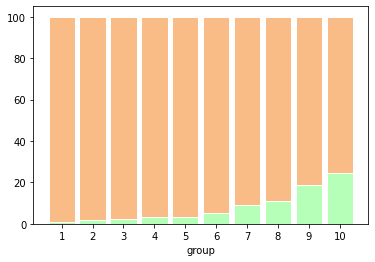

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4, 5, 6, 7, 8, 9]

 
# From raw value to percentage
totals = [i+j for i,j in zip(decile_NN['event'], decile_NN['not_event'])]
greenBars = [i / j * 100 for i,j in zip(decile_NN['event'], totals)]
orangeBars = [i / j * 100 for i,j in zip(decile_NN['not_event'], totals)]
 
# plot
barWidth = 0.85
names = ('1','2','3','4','5', '6', '7', '8', '9', '10')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()


## LightGBM

In [ ]:
#dtree = LGBMClassifier(max_depth = 2, min_samples_split=100, min_data_in_leaf = 250,n_estimators=300,
#                            min_impurity_decrease=1e-03, lambda_l1=0.3,
#                       lambda_l2=0.7, random_state=11235, eta = 0.005)

In [ ]:
###GRID SEARCH LGBM ---> NAO RODAR SEMPRE

list_i = [2, 4, 6]
list_j = [50, 100, 200]
list_k = [200, 300, 400]
list_l = [100, 200, 300]

for i in list_i:
    for j in list_j:
        for k in list_k:
            for l in list_l:
                dtree = LGBMClassifier(max_depth = i, min_samples_split=j, min_data_in_leaf = k,n_estimators=l,
                            min_impurity_decrease=1e-03, lambda_l1=0.3, lambda_l2=0.7, random_state=11235, eta = 0.005)
                class_tree = dtree.fit(X_train, y_train)
                auc_valid = metrics_sk.roc_auc_score(y_valid, class_tree.predict_proba(X_valid)[:,1])
                print('depth: ', i, 'samples_split: ', j, 'data_in_leaf: ', k, 'n_estimators: ', l, 'auc_valid: ', auc_valid)

In [55]:
dtree = LGBMClassifier(max_depth = 4, min_samples_split=50, min_data_in_leaf = 400,n_estimators=300,
                            min_impurity_decrease=1e-03, lambda_l1=0.3,
                       lambda_l2=0.7, random_state=11235, eta = 0.005)

In [56]:
class_tree = dtree.fit(X, y)

In [57]:
acc_valid = metrics_sk.accuracy_score(y_valid, class_tree.predict(X_valid))
f1_valid = metrics_sk.f1_score(y_valid, class_tree.predict(X_valid))
precision_valid = metrics_sk.precision_score(y_valid, class_tree.predict(X_valid))
recall_valid = metrics_sk.recall_score(y_valid, class_tree.predict(X_valid))
auc_valid = metrics_sk.roc_auc_score(y_valid, class_tree.predict_proba(X_valid)[:,1])

print('accuracy_valid: ',acc_valid)
print('precision_valid: ',precision_valid)
print('recall_valid: ',recall_valid)
print('F1_valid: ',f1_valid)
print('AUC_valid: ',auc_valid)

accuracy_valid:  0.92025
precision_valid:  0.5760135135135135
recall_valid:  0.042281463112213265
F1_valid:  0.07878017789072427
AUC_valid:  0.7833506401646141


In [59]:
acc_test_final = metrics_sk.accuracy_score(y_test_final, (class_tree.predict(X_test_final)))
f1_test_final = metrics_sk.f1_score(y_test_final, (class_tree.predict(X_test_final)))
precision_test_final = metrics_sk.precision_score(y_test_final, (class_tree.predict(X_test_final)))
recall_test_final = metrics_sk.recall_score(y_test_final, (class_tree.predict(X_test_final)))
auc_test_final = metrics_sk.roc_auc_score(y_test_final, class_tree.predict_proba(X_test_final)[:,1])

print('accuracy_test_final: ',acc_test_final)
print('precision_test_final: ',precision_test_final)
print('recall_test_final: ',recall_test_final)
print('F1_test_final: ',f1_test_final)
print('AUC_test_final: ',auc_test_final)

accuracy_test_final:  0.9193183331114365
precision_test_final:  0.45
recall_test_final:  0.029900332225913623
F1_test_final:  0.056074766355140186
AUC_test_final:  0.782497334835539


In [61]:
df_class_tree_test_final = pd.DataFrame()
df_class_tree_test_final['score'] = class_tree.predict_proba(X_test_final)[:,1].ravel()
df_class_tree_test_final['y_target'] = np.array(y_test_final)
df_class_tree_test_final['decile'] = pd.qcut(df_class_tree_test_final['score'], q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])



In [69]:
decile_class_tree = pd.DataFrame()
decile_class_tree['event'] = df_class_tree_test_final[df_class_tree_test_final['y_target']==1].groupby(['decile'])['y_target'].count()
decile_class_tree['not_event'] = df_class_tree_test_final[df_class_tree_test_final['y_target']==0].groupby(['decile'])['y_target'].count()
decile_class_tree['bad_rate'] = (decile_class_tree['event']/(decile_class_tree['event']+decile_class_tree['not_event'])).round(4)

In [70]:
decile_class_tree

,event,not_event,bad_rate
decile,,,
1,6,746,0.0080
2,9,742,0.0120
3,22,729,0.0293
4,22,729,0.0293
5,17,734,0.0226
6,43,708,0.0573
7,61,690,0.0812
8,99,652,0.1318
9,117,634,0.1558


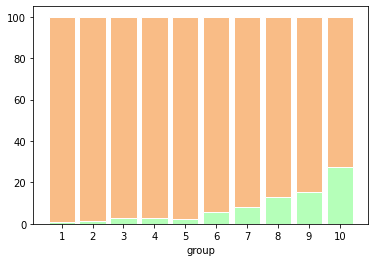

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4, 5, 6, 7, 8, 9]

 
# From raw value to percentage
totals = [i+j for i,j in zip(decile_class_tree['event'], decile_class_tree['not_event'])]
greenBars = [i / j * 100 for i,j in zip(decile_class_tree['event'], totals)]
orangeBars = [i / j * 100 for i,j in zip(decile_class_tree['not_event'], totals)]
 
# plot
barWidth = 0.85
names = ('1','2','3','4','5', '6', '7', '8', '9', '10')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()

## Stacking NN+LGBM

In [73]:
pred_nn = NN_Model.predict(X_valid)
pred_lgbm = class_tree.predict_proba(X_valid)[:,1].reshape(-1, 1)


In [74]:
X_stack = np.zeros((pred_nn.shape[0], 2))

In [75]:
X_stack[:,0] = pred_nn.reshape(1, -1)
X_stack[:,1] = pred_lgbm.reshape(1, -1)
#X_stack[:,2] = pred_nn.reshape(1, -1)**2
#X_stack[:,3] = pred_lgbm.reshape(1, -1)**2
#X_stack[:,4] = pred_nn.reshape(1, -1)**3
#X_stack[:,5] = pred_lgbm.reshape(1, -1)**3

In [76]:
class_weight = {0: 1/(y_valid==0).sum(), 1: 1/(y_valid==1).sum()}

In [77]:
lr = LogisticRegression()#class_weight=class_weight

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
nb = GaussianNB(var_smoothing = 0.01)

In [80]:
lr_ = lr.fit(X_stack, y_valid)

In [81]:
nb_ = nb.fit(X_stack, y_valid)

## Validação - supervisor logistico

In [82]:
acc_stack = metrics_sk.accuracy_score(y_valid, lr_.predict(X_stack))
f1_stack = metrics_sk.f1_score(y_valid, lr_.predict(X_stack))
precision_stack = metrics_sk.precision_score(y_valid, lr_.predict(X_stack))
recall_stack = metrics_sk.recall_score(y_valid, lr_.predict(X_stack))
auc_stack = metrics_sk.roc_auc_score(y_valid, lr_.predict_proba(X_stack)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.9202
precision_stack:  0.5525339925834364
recall_stack:  0.05542467451952883
F1_stack:  0.10074374577417175
AUC_stack:  0.7790882456880183


## Validação - supervisor Naive Bayes

In [83]:
acc_stack = metrics_sk.accuracy_score(y_valid, nb_.predict(X_stack))
f1_stack = metrics_sk.f1_score(y_valid, nb_.predict(X_stack))
precision_stack = metrics_sk.precision_score(y_valid, nb_.predict(X_stack))
recall_stack = metrics_sk.recall_score(y_valid, nb_.predict(X_stack))
auc_stack = metrics_sk.roc_auc_score(y_valid, nb_.predict_proba(X_stack)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.89431
precision_stack:  0.3279274326553051
recall_stack:  0.2958462492250465
F1_stack:  0.3110618603741607
AUC_stack:  0.7783997447453964


In [84]:
pred_nn_final = NN_Model.predict(X_test_final)
pred_lgbm_final = class_tree.predict_proba(X_test_final)[:,1].reshape(-1, 1)

In [85]:
X_stack_final = np.zeros((pred_nn_final.shape[0], 2))

In [86]:
X_stack_final[:,0] = pred_nn_final.reshape(1, -1)
X_stack_final[:,1] = pred_lgbm_final.reshape(1, -1)
#X_stack_final[:,2] = pred_nn_final.reshape(1, -1)**2
#X_stack_final[:,3] = pred_lgbm_final.reshape(1, -1)**2
#X_stack_final[:,4] = pred_nn_final.reshape(1, -1)**3
#X_stack_final[:,5] = pred_lgbm_final.reshape(1, -1)**3

## Teste final - supervisor Naive Bayes

In [87]:
acc_stack = metrics_sk.accuracy_score(y_test_final, nb_.predict(X_stack_final))
f1_stack = metrics_sk.f1_score(y_test_final, nb_.predict(X_stack_final))
precision_stack = metrics_sk.precision_score(y_test_final, nb_.predict(X_stack_final))
recall_stack = metrics_sk.recall_score(y_test_final, nb_.predict(X_stack_final))
auc_stack = metrics_sk.roc_auc_score(y_test_final, nb_.predict_proba(X_stack_final)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.889229130608441
precision_stack:  0.29537366548042704
recall_stack:  0.2757475083056478
F1_stack:  0.2852233676975945
AUC_stack:  0.7772545223645406


## Teste final - supervisor logístico

In [88]:
acc_stack = metrics_sk.accuracy_score(y_test_final, lr_.predict(X_stack_final))
f1_stack = metrics_sk.f1_score(y_test_final, lr_.predict(X_stack_final))
precision_stack = metrics_sk.precision_score(y_test_final, lr_.predict(X_stack_final))
recall_stack = metrics_sk.recall_score(y_test_final, lr_.predict(X_stack_final))
auc_stack = metrics_sk.roc_auc_score(y_test_final, lr_.predict_proba(X_stack_final)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.9195846092397817
precision_stack:  0.4807692307692308
recall_stack:  0.04152823920265781
F1_stack:  0.0764525993883792
AUC_stack:  0.7778625693579899


# Optimizing F1 Score

In [89]:
#### optimizing f1 score
X_opt = np.zeros((X_stack.shape[0], 4))

In [90]:
X_opt[:,0] = 1
X_opt[:,1:3]=X_stack
X_opt[:,3] = y_valid

In [ ]:
#def sigmoid(x): resulta em overflow essa merda
#    return 1/(1+np.exp(-x))

In [91]:
def sigmoid(x): ##corrigido
    if x.all()>=0:
        z = np.exp(-x)
        return 1/(1+z)
    else:
        z = np.exp(-x)
        return z/(1+z)

In [92]:
def sigmoid1(x): ##derivada
    return sigmoid(x)*(1-sigmoid(x))

In [93]:
alpha = 0.25 ##obtive via grid search 
gamma = 2

In [94]:
def f(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    F = A/(alpha*npos +(1-alpha)*mpos)
    return -F

In [95]:
def logf(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    logF = np.log(A) - np.log((alpha*npos +(1-alpha)*mpos))
    return -logF.round(3)

In [96]:
def df(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    h = 1/(alpha*npos + (1-alpha)*mpos)
    dF=np.zeros((theta.shape))
    dA = np.zeros((theta.shape))
    dmpos = np.zeros((theta.shape))
    
    for j in range(X_opt.shape[1]-1):
        dA[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta))*gamma*X_opt[X_opt[:,3]==1,j])
        dmpos[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[:,:3], theta))*gamma*X_opt[:,j])
        dF[j] = h*dA[j]-(h**2)*A*(1-alpha)*dmpos[j]
    return -dF
        
    

In [97]:
def dlogf(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    dlogF=np.zeros((theta.shape))
    dA = np.zeros((theta.shape))
    dmpos = np.zeros((theta.shape))
    
    for j in range(X_opt.shape[1]-1):
        dA[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta))*gamma*X_opt[X_opt[:,3]==1,j])
        dmpos[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[:,:3], theta))*gamma*X_opt[:,j])
        dlogF[j] = (1/A)*dA[j] - (1/(alpha*npos + (1-alpha)*mpos))*(1-alpha)*dmpos[j]
    return -dlogF.round(3)

In [98]:
from scipy import optimize

In [99]:
def predict_opt(X, theta_opt):
    score = sigmoid(np.dot(X[:,:-1], theta_opt))
    predict = (score>0.5).astype(int)
    return (score, predict)

In [159]:
##GRID SEARCH + RANDOM INITIALIZATION --> nao rodar sempre
np.random.seed(42)
#theta_matrix = np.random.normal(loc=0.0, scale=20.0, size=(150, 3)).round(3)
theta_matrix = np.random.randint(low=-30, high=30, size=(200, 3))

list_alpha = [0.25, 0.5, 0.75] 
list_gamma = [2, 4, 8]

lista_alpha = []
lista_gamma = []
lista_theta = []
lista_theta_opt = []
lista_auc = []
lista_precision = []
lista_recall = []
lista_f1 = []

for i in range(len(list_alpha)):
    for j in range(len(list_gamma)):
        for k in range(theta_matrix.shape[0]):
            
            alpha = list_alpha[i]
            gamma = list_gamma[j]
            theta = theta_matrix[k,:].T
            theta_opt = optimize.minimize(logf, theta, jac = dlogf, method = 'bfgs').x
            #theta_opt,k = bfgs_method(f, df, theta, maxiter = None, epsi = 0.0001)
            score, predicted = predict_opt(X_opt, theta_opt)
            print('alpha = ', alpha, 'gamma = ', gamma, 'theta_init = ', theta,
                  'theta_opt = ', theta_opt,
                  'AUC = ', metrics_sk.roc_auc_score(y_valid, score),
                  'precision = ', metrics_sk.precision_score(y_valid, predicted),
                  'recall = ', metrics_sk.recall_score(y_valid, predicted),
                  'F1 = ', metrics_sk.f1_score(y_valid, predicted))
            lista_alpha.append(alpha)
            lista_gamma.append(gamma)
            lista_theta.append(theta)
            lista_theta_opt.append(theta_opt)
            lista_auc.append(metrics_sk.roc_auc_score(y_valid, score))
            lista_precision.append(metrics_sk.precision_score(y_valid, predicted))
            lista_recall.append(metrics_sk.recall_score(y_valid, predicted))
            lista_f1.append(metrics_sk.f1_score(y_valid, predicted))

alpha =  0.25 gamma =  2 theta_init =  [ 8 21 -2] theta_opt =  [ 8. 21. -2.] AUC =  0.7701455909491028 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-16  12 -23] theta_opt =  [  0.88272396  24.68736705 -21.03316266] AUC =  0.7330314515386975 precision =  0.08064403220161008 recall =  0.9998760074395536 F1 =  0.14925041643531373
alpha =  0.25 gamma =  2 theta_init =  [-10   8  27] theta_opt =  [-11.83172529   6.77132075  26.71273583] AUC =  0.7823135142483717 precision =  0.3458983726336765 recall =  0.2582765034097954 F1 =  0.2957336551430396
alpha =  0.25 gamma =  2 theta_init =  [-12  -8 -20] theta_opt =  [ 22.69729066  -3.56354196 -19.09892867] AUC =  0.21710557517742715 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-20  -7  22] theta_opt =  [-9.58833153  2.57936186 30.17454729] AUC =  0.7837046666741518 precision =  0.35086206896551725 recall =  0.2523248605083695 F1 =  0.2

alpha =  0.25 gamma =  2 theta_init =  [ -7 -30  13] theta_opt =  [ 24.48215776 -29.58578425  19.42441142] AUC =  0.2510401507089213 precision =  0.08065241957258718 recall =  1.0 F1 =  0.14926616201810072
alpha =  0.25 gamma =  2 theta_init =  [-23  -7 -20] theta_opt =  [ 62.28125825   2.76470407 -18.59285924] AUC =  0.5 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ 20 -14 -23] theta_opt =  [ 24.80043941  -9.90687757 -21.21289776] AUC =  0.21926997601441567 precision =  0.08051851925942967 recall =  0.9981401115933044 F1 =  0.1490161233594343
alpha =  0.25 gamma =  2 theta_init =  [4 4 2] theta_opt =  [4. 4. 2.] AUC =  0.7760714534862178 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ 28 -26  11] theta_opt =  [ 28. -26.  11.] AUC =  0.23880192786953477 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ 8 27 10] theta_opt =  [ 

alpha =  0.25 gamma =  2 theta_init =  [-28  18   6] theta_opt =  [-21.49626392  24.14867474  10.27914471] AUC =  0.7756176583829292 precision =  0.33506102658418324 recall =  0.24848109113453193 F1 =  0.2853481418197351
alpha =  0.25 gamma =  2 theta_init =  [ 18  25 -14] theta_opt =  [ 18.  25. -14.] AUC =  0.7547874915398698 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ 28  18 -29] theta_opt =  [ 28.  18. -29.] AUC =  0.61992528549663 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-29  -3  23] theta_opt =  [-15.856719     9.45325875  34.04692768] AUC =  0.7821115561477688 precision =  0.3490598290598291 recall =  0.2531928084314941 F1 =  0.29349622709306505
alpha =  0.25 gamma =  2 theta_init =  [-8  6  1] theta_opt =  [-48.1940029   35.77916795  78.65866527] AUC =  0.7808085647454833 precision =  0.35557570262919314 recall =  0.24314941103533788 F1 =  0.2888070692194403
alp

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.25 gamma =  2 theta_init =  [-20  17 -15] theta_opt =  [-471.79873023  328.48769765  825.33166467] AUC =  0.7806474155521953 precision =  0.3581672564723412 recall =  0.2384376937383757 F1 =  0.28628852166145596
alpha =  0.25 gamma =  2 theta_init =  [  2 -22  29] theta_opt =  [  7.16815949 -13.15253315  35.0301908 ] AUC =  0.53867055388435 precision =  0.08065016564411037 recall =  0.9991320520768754 F1 =  0.14925262553483115
alpha =  0.25 gamma =  2 theta_init =  [ 28 -25 -15] theta_opt =  [ 31.86184765 -21.64513619 -13.47948823] AUC =  0.2232667261914576 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.25 gamma =  2 theta_init =  [ -2 -28 -11] theta_opt =  [ 32.90960096 -25.19495759 -10.28698127] AUC =  0.2244972790184283 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.25 gamma =  2 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6415155172269043 precision =  0.

alpha =  0.25 gamma =  2 theta_init =  [ -4   3 -10] theta_opt =  [-60.77736839  70.71653022  25.91644304] AUC =  0.7752165083615405 precision =  0.3192956713132795 recall =  0.2698078115313081 F1 =  0.2924731182795699
alpha =  0.25 gamma =  2 theta_init =  [-1  2 -3] theta_opt =  [-30.90588009  33.74608532  16.82897984] AUC =  0.7760638616645746 precision =  0.3433415754150477 recall =  0.24104153750774954 F1 =  0.283237415312887
alpha =  0.25 gamma =  2 theta_init =  [ 16   2 -26] theta_opt =  [ 16.   2. -26.] AUC =  0.22391246598625525 precision =  0.0804513760366543 recall =  0.9971481711097334 F1 =  0.14889008201729215
alpha =  0.25 gamma =  2 theta_init =  [ 29  17 -12] theta_opt =  [ 29.  17. -12.] AUC =  0.7351692432363885 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-27   4  18] theta_opt =  [-16.97043828  13.47971527  25.79933101] AUC =  0.7803924488955529 precision =  0.3477962613616875 recall =  0.2514569125852449 F1 =

alpha =  0.25 gamma =  2 theta_init =  [21 -1 16] theta_opt =  [21. -1. 16.] AUC =  0.7786457944845058 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ 4 24  9] theta_opt =  [ 4. 24.  9.] AUC =  0.7752759387436154 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ 21 -15 -18] theta_opt =  [ 26.17606658 -10.5235484  -15.85719922] AUC =  0.22037119071599381 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [19 29 11] theta_opt =  [19. 29. 11.] AUC =  0.7569987198494745 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ -1 -12 -14] theta_opt =  [ 18.69738095  -8.50864846 -13.3417619 ] AUC =  0.22024198678606288 precision =  0.08060564239496765 recall =  0.9993800371977681 F1 =  0.14917914453349126
alpha =  0.25 gamma =  2 theta_init =  [ 25 -12  -3] theta_opt =  [ 25. -12.  -3.] AUC =  0

alpha =  0.25 gamma =  4 theta_init =  [ 5 19  9] theta_opt =  [ 5. 19.  9.] AUC =  0.7759154859910561 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [-27 -29 -25] theta_opt =  [ 58.78768715 -25.86874942 -24.05633544] AUC =  0.3355123749626199 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ 23  11 -27] theta_opt =  [ 23.  11. -27.] AUC =  0.48853427637002356 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ 23  -2 -13] theta_opt =  [ 23.  -2. -13.] AUC =  0.21681799834926097 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [-5 13  3] theta_opt =  [-9.42549409 11.406042    2.82999197] AUC =  0.7743046239001915 precision =  0.313273106323836 recall =  0.2794792312461252 F1 =  0.2954128440366972
alpha =  0.25 gamma =  4 theta_init =  [-21   5 -17] theta_opt =  [-71.84236356  74.1609

alpha =  0.25 gamma =  4 theta_init =  [-25  -3  -3] theta_opt =  [57.68866434 19.78072703  0.7209899 ] AUC =  0.5 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ 13  13 -11] theta_opt =  [ 13.  13. -11.] AUC =  0.7335974994597623 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ -1 -20  27] theta_opt =  [-3.84366484 -6.94005381 36.38342757] AUC =  0.7144800699677605 precision =  0.344068079425997 recall =  0.2556726596404216 F1 =  0.29335609617299757
alpha =  0.25 gamma =  4 theta_init =  [24 -3 -6] theta_opt =  [24. -3. -6.] AUC =  0.21947345881822822 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [  8   2 -30] theta_opt =  [ 15.23134667   7.9510568  -27.63611488] AUC =  0.3777898540206258 precision =  0.08062322492899716 recall =  0.9996280223186609 F1 =  0.1492120191373391
alpha =  0.25 gamma =  4 theta_init =  [26 -4 26] the

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.25 gamma =  4 theta_init =  [-20  17 -15] theta_opt =  [-471.79873023  328.48769765  825.33166467] AUC =  0.7806474155521953 precision =  0.3581672564723412 recall =  0.2384376937383757 F1 =  0.28628852166145596
alpha =  0.25 gamma =  4 theta_init =  [  2 -22  29] theta_opt =  [  7.16815949 -13.15253315  35.0301908 ] AUC =  0.53867055388435 precision =  0.08065016564411037 recall =  0.9991320520768754 F1 =  0.14925262553483115
alpha =  0.25 gamma =  4 theta_init =  [ 28 -25 -15] theta_opt =  [ 31.86184765 -21.64513619 -13.47948823] AUC =  0.2232667261914576 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.25 gamma =  4 theta_init =  [ -2 -28 -11] theta_opt =  [ 32.90960096 -25.19495759 -10.28698127] AUC =  0.2244972790184283 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.25 gamma =  4 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6415155172269043 precision =  0.

alpha =  0.25 gamma =  4 theta_init =  [ -4   3 -10] theta_opt =  [-60.77736839  70.71653022  25.91644304] AUC =  0.7752165083615405 precision =  0.3192956713132795 recall =  0.2698078115313081 F1 =  0.2924731182795699
alpha =  0.25 gamma =  4 theta_init =  [-1  2 -3] theta_opt =  [-30.90588009  33.74608532  16.82897984] AUC =  0.7760638616645746 precision =  0.3433415754150477 recall =  0.24104153750774954 F1 =  0.283237415312887
alpha =  0.25 gamma =  4 theta_init =  [ 16   2 -26] theta_opt =  [ 16.   2. -26.] AUC =  0.22391246598625525 precision =  0.0804513760366543 recall =  0.9971481711097334 F1 =  0.14889008201729215
alpha =  0.25 gamma =  4 theta_init =  [ 29  17 -12] theta_opt =  [ 29.  17. -12.] AUC =  0.7351692432363885 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [-27   4  18] theta_opt =  [-16.97043828  13.47971527  25.79933101] AUC =  0.7803924488955529 precision =  0.3477962613616875 recall =  0.2514569125852449 F1 =

alpha =  0.25 gamma =  4 theta_init =  [21 -1 16] theta_opt =  [21. -1. 16.] AUC =  0.7786457944845058 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ 4 24  9] theta_opt =  [ 4. 24.  9.] AUC =  0.7752759387436154 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ 21 -15 -18] theta_opt =  [ 26.17606658 -10.5235484  -15.85719922] AUC =  0.22037119071599381 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [19 29 11] theta_opt =  [19. 29. 11.] AUC =  0.7569987198494745 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ -1 -12 -14] theta_opt =  [ 18.69738095  -8.50864846 -13.3417619 ] AUC =  0.22024198678606288 precision =  0.08060564239496765 recall =  0.9993800371977681 F1 =  0.14917914453349126
alpha =  0.25 gamma =  4 theta_init =  [ 25 -12  -3] theta_opt =  [ 25. -12.  -3.] AUC =  0

alpha =  0.25 gamma =  8 theta_init =  [ 5 19  9] theta_opt =  [ 5. 19.  9.] AUC =  0.7759154859910561 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  8 theta_init =  [-27 -29 -25] theta_opt =  [ 58.78768715 -25.86874942 -24.05633544] AUC =  0.3355123749626199 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  8 theta_init =  [ 23  11 -27] theta_opt =  [ 23.  11. -27.] AUC =  0.48853427637002356 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  8 theta_init =  [ 23  -2 -13] theta_opt =  [ 23.  -2. -13.] AUC =  0.21681799834926097 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  8 theta_init =  [-5 13  3] theta_opt =  [-9.42549409 11.406042    2.82999197] AUC =  0.7743046239001915 precision =  0.313273106323836 recall =  0.2794792312461252 F1 =  0.2954128440366972
alpha =  0.25 gamma =  8 theta_init =  [-21   5 -17] theta_opt =  [-71.84236356  74.1609

alpha =  0.25 gamma =  8 theta_init =  [-25  -3  -3] theta_opt =  [57.68866434 19.78072703  0.7209899 ] AUC =  0.5 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  8 theta_init =  [ 13  13 -11] theta_opt =  [ 13.  13. -11.] AUC =  0.7335974994597623 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  8 theta_init =  [ -1 -20  27] theta_opt =  [-3.84366484 -6.94005381 36.38342757] AUC =  0.7144800699677605 precision =  0.344068079425997 recall =  0.2556726596404216 F1 =  0.29335609617299757
alpha =  0.25 gamma =  8 theta_init =  [24 -3 -6] theta_opt =  [24. -3. -6.] AUC =  0.21947345881822822 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  8 theta_init =  [  8   2 -30] theta_opt =  [ 15.23134667   7.9510568  -27.63611488] AUC =  0.3777898540206258 precision =  0.08062322492899716 recall =  0.9996280223186609 F1 =  0.1492120191373391
alpha =  0.25 gamma =  8 theta_init =  [26 -4 26] the

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.25 gamma =  8 theta_init =  [-20  17 -15] theta_opt =  [-471.79873023  328.48769765  825.33166467] AUC =  0.7806474155521953 precision =  0.3581672564723412 recall =  0.2384376937383757 F1 =  0.28628852166145596
alpha =  0.25 gamma =  8 theta_init =  [  2 -22  29] theta_opt =  [  7.16815949 -13.15253315  35.0301908 ] AUC =  0.53867055388435 precision =  0.08065016564411037 recall =  0.9991320520768754 F1 =  0.14925262553483115
alpha =  0.25 gamma =  8 theta_init =  [ 28 -25 -15] theta_opt =  [ 31.86184765 -21.64513619 -13.47948823] AUC =  0.2232667261914576 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.25 gamma =  8 theta_init =  [ -2 -28 -11] theta_opt =  [ 32.90960096 -25.19495759 -10.28698127] AUC =  0.2244972790184283 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.25 gamma =  8 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6415155172269043 precision =  0.

alpha =  0.25 gamma =  8 theta_init =  [ -4   3 -10] theta_opt =  [-60.77736839  70.71653022  25.91644304] AUC =  0.7752165083615405 precision =  0.3192956713132795 recall =  0.2698078115313081 F1 =  0.2924731182795699
alpha =  0.25 gamma =  8 theta_init =  [-1  2 -3] theta_opt =  [-30.90588009  33.74608532  16.82897984] AUC =  0.7760638616645746 precision =  0.3433415754150477 recall =  0.24104153750774954 F1 =  0.283237415312887
alpha =  0.25 gamma =  8 theta_init =  [ 16   2 -26] theta_opt =  [ 16.   2. -26.] AUC =  0.22391246598625525 precision =  0.0804513760366543 recall =  0.9971481711097334 F1 =  0.14889008201729215
alpha =  0.25 gamma =  8 theta_init =  [ 29  17 -12] theta_opt =  [ 29.  17. -12.] AUC =  0.7351692432363885 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  8 theta_init =  [-27   4  18] theta_opt =  [-16.97043828  13.47971527  25.79933101] AUC =  0.7803924488955529 precision =  0.3477962613616875 recall =  0.2514569125852449 F1 =

alpha =  0.25 gamma =  8 theta_init =  [21 -1 16] theta_opt =  [21. -1. 16.] AUC =  0.7786457944845058 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  8 theta_init =  [ 4 24  9] theta_opt =  [ 4. 24.  9.] AUC =  0.7752759387436154 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  8 theta_init =  [ 21 -15 -18] theta_opt =  [ 26.17606658 -10.5235484  -15.85719922] AUC =  0.22037119071599381 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  8 theta_init =  [19 29 11] theta_opt =  [19. 29. 11.] AUC =  0.7569987198494745 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  8 theta_init =  [ -1 -12 -14] theta_opt =  [ 18.69738095  -8.50864846 -13.3417619 ] AUC =  0.22024198678606288 precision =  0.08060564239496765 recall =  0.9993800371977681 F1 =  0.14917914453349126
alpha =  0.25 gamma =  8 theta_init =  [ 25 -12  -3] theta_opt =  [ 25. -12.  -3.] AUC =  0

alpha =  0.5 gamma =  2 theta_init =  [ 5 19  9] theta_opt =  [ 5. 19.  9.] AUC =  0.7759154859910561 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [-27 -29 -25] theta_opt =  [ 58.78768715 -25.86874942 -24.05633544] AUC =  0.3355123749626199 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ 23  11 -27] theta_opt =  [ 23.  11. -27.] AUC =  0.48853427637002356 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ 23  -2 -13] theta_opt =  [ 23.  -2. -13.] AUC =  0.21681799834926097 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [-5 13  3] theta_opt =  [-9.42549409 11.406042    2.82999197] AUC =  0.7743046239001915 precision =  0.313273106323836 recall =  0.2794792312461252 F1 =  0.2954128440366972
alpha =  0.5 gamma =  2 theta_init =  [-21   5 -17] theta_opt =  [-71.84236356  74.16090938  

alpha =  0.5 gamma =  2 theta_init =  [-25  -3  -3] theta_opt =  [57.68866434 19.78072703  0.7209899 ] AUC =  0.5 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ 13  13 -11] theta_opt =  [ 13.  13. -11.] AUC =  0.7335974994597623 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ -1 -20  27] theta_opt =  [-3.84366484 -6.94005381 36.38342757] AUC =  0.7144800699677605 precision =  0.344068079425997 recall =  0.2556726596404216 F1 =  0.29335609617299757
alpha =  0.5 gamma =  2 theta_init =  [24 -3 -6] theta_opt =  [24. -3. -6.] AUC =  0.21947345881822822 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [  8   2 -30] theta_opt =  [ 15.23134667   7.9510568  -27.63611488] AUC =  0.3777898540206258 precision =  0.08062322492899716 recall =  0.9996280223186609 F1 =  0.1492120191373391
alpha =  0.5 gamma =  2 theta_init =  [26 -4 26] theta_opt

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.5 gamma =  2 theta_init =  [-20  17 -15] theta_opt =  [-471.79873023  328.48769765  825.33166467] AUC =  0.7806474155521953 precision =  0.3581672564723412 recall =  0.2384376937383757 F1 =  0.28628852166145596
alpha =  0.5 gamma =  2 theta_init =  [  2 -22  29] theta_opt =  [  7.16815949 -13.15253315  35.0301908 ] AUC =  0.53867055388435 precision =  0.08065016564411037 recall =  0.9991320520768754 F1 =  0.14925262553483115
alpha =  0.5 gamma =  2 theta_init =  [ 28 -25 -15] theta_opt =  [ 31.86184765 -21.64513619 -13.47948823] AUC =  0.2232667261914576 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.5 gamma =  2 theta_init =  [ -2 -28 -11] theta_opt =  [ 32.90960096 -25.19495759 -10.28698127] AUC =  0.2244972790184283 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.5 gamma =  2 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6415155172269043 precision =  0.08065

alpha =  0.5 gamma =  2 theta_init =  [ -4   3 -10] theta_opt =  [-60.77736839  70.71653022  25.91644304] AUC =  0.7752165083615405 precision =  0.3192956713132795 recall =  0.2698078115313081 F1 =  0.2924731182795699
alpha =  0.5 gamma =  2 theta_init =  [-1  2 -3] theta_opt =  [-30.90588009  33.74608532  16.82897984] AUC =  0.7760638616645746 precision =  0.3433415754150477 recall =  0.24104153750774954 F1 =  0.283237415312887
alpha =  0.5 gamma =  2 theta_init =  [ 16   2 -26] theta_opt =  [ 16.   2. -26.] AUC =  0.22391246598625525 precision =  0.0804513760366543 recall =  0.9971481711097334 F1 =  0.14889008201729215
alpha =  0.5 gamma =  2 theta_init =  [ 29  17 -12] theta_opt =  [ 29.  17. -12.] AUC =  0.7351692432363885 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [-27   4  18] theta_opt =  [-16.97043828  13.47971527  25.79933101] AUC =  0.7803924488955529 precision =  0.3477962613616875 recall =  0.2514569125852449 F1 =  0.2

alpha =  0.5 gamma =  2 theta_init =  [21 -1 16] theta_opt =  [21. -1. 16.] AUC =  0.7786457944845058 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ 4 24  9] theta_opt =  [ 4. 24.  9.] AUC =  0.7752759387436154 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ 21 -15 -18] theta_opt =  [ 26.17606658 -10.5235484  -15.85719922] AUC =  0.22037119071599381 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [19 29 11] theta_opt =  [19. 29. 11.] AUC =  0.7569987198494745 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ -1 -12 -14] theta_opt =  [ 18.69738095  -8.50864846 -13.3417619 ] AUC =  0.22024198678606288 precision =  0.08060564239496765 recall =  0.9993800371977681 F1 =  0.14917914453349126
alpha =  0.5 gamma =  2 theta_init =  [ 25 -12  -3] theta_opt =  [ 25. -12.  -3.] AUC =  0.22567

alpha =  0.5 gamma =  4 theta_init =  [ 5 19  9] theta_opt =  [ 5. 19.  9.] AUC =  0.7759154859910561 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [-27 -29 -25] theta_opt =  [ 58.78768715 -25.86874942 -24.05633544] AUC =  0.3355123749626199 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ 23  11 -27] theta_opt =  [ 23.  11. -27.] AUC =  0.48853427637002356 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ 23  -2 -13] theta_opt =  [ 23.  -2. -13.] AUC =  0.21681799834926097 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [-5 13  3] theta_opt =  [-9.42549409 11.406042    2.82999197] AUC =  0.7743046239001915 precision =  0.313273106323836 recall =  0.2794792312461252 F1 =  0.2954128440366972
alpha =  0.5 gamma =  4 theta_init =  [-21   5 -17] theta_opt =  [-71.84236356  74.16090938  

alpha =  0.5 gamma =  4 theta_init =  [-25  -3  -3] theta_opt =  [57.68866434 19.78072703  0.7209899 ] AUC =  0.5 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ 13  13 -11] theta_opt =  [ 13.  13. -11.] AUC =  0.7335974994597623 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ -1 -20  27] theta_opt =  [-3.84366484 -6.94005381 36.38342757] AUC =  0.7144800699677605 precision =  0.344068079425997 recall =  0.2556726596404216 F1 =  0.29335609617299757
alpha =  0.5 gamma =  4 theta_init =  [24 -3 -6] theta_opt =  [24. -3. -6.] AUC =  0.21947345881822822 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [  8   2 -30] theta_opt =  [ 15.23134667   7.9510568  -27.63611488] AUC =  0.3777898540206258 precision =  0.08062322492899716 recall =  0.9996280223186609 F1 =  0.1492120191373391
alpha =  0.5 gamma =  4 theta_init =  [26 -4 26] theta_opt

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.5 gamma =  4 theta_init =  [-20  17 -15] theta_opt =  [-471.79873023  328.48769765  825.33166467] AUC =  0.7806474155521953 precision =  0.3581672564723412 recall =  0.2384376937383757 F1 =  0.28628852166145596
alpha =  0.5 gamma =  4 theta_init =  [  2 -22  29] theta_opt =  [  7.16815949 -13.15253315  35.0301908 ] AUC =  0.53867055388435 precision =  0.08065016564411037 recall =  0.9991320520768754 F1 =  0.14925262553483115
alpha =  0.5 gamma =  4 theta_init =  [ 28 -25 -15] theta_opt =  [ 31.86184765 -21.64513619 -13.47948823] AUC =  0.2232667261914576 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.5 gamma =  4 theta_init =  [ -2 -28 -11] theta_opt =  [ 32.90960096 -25.19495759 -10.28698127] AUC =  0.2244972790184283 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.5 gamma =  4 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6415155172269043 precision =  0.08065

alpha =  0.5 gamma =  4 theta_init =  [ -4   3 -10] theta_opt =  [-60.77736839  70.71653022  25.91644304] AUC =  0.7752165083615405 precision =  0.3192956713132795 recall =  0.2698078115313081 F1 =  0.2924731182795699
alpha =  0.5 gamma =  4 theta_init =  [-1  2 -3] theta_opt =  [-30.90588009  33.74608532  16.82897984] AUC =  0.7760638616645746 precision =  0.3433415754150477 recall =  0.24104153750774954 F1 =  0.283237415312887
alpha =  0.5 gamma =  4 theta_init =  [ 16   2 -26] theta_opt =  [ 16.   2. -26.] AUC =  0.22391246598625525 precision =  0.0804513760366543 recall =  0.9971481711097334 F1 =  0.14889008201729215
alpha =  0.5 gamma =  4 theta_init =  [ 29  17 -12] theta_opt =  [ 29.  17. -12.] AUC =  0.7351692432363885 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [-27   4  18] theta_opt =  [-16.97043828  13.47971527  25.79933101] AUC =  0.7803924488955529 precision =  0.3477962613616875 recall =  0.2514569125852449 F1 =  0.2

alpha =  0.5 gamma =  4 theta_init =  [21 -1 16] theta_opt =  [21. -1. 16.] AUC =  0.7786457944845058 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ 4 24  9] theta_opt =  [ 4. 24.  9.] AUC =  0.7752759387436154 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ 21 -15 -18] theta_opt =  [ 26.17606658 -10.5235484  -15.85719922] AUC =  0.22037119071599381 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [19 29 11] theta_opt =  [19. 29. 11.] AUC =  0.7569987198494745 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ -1 -12 -14] theta_opt =  [ 18.69738095  -8.50864846 -13.3417619 ] AUC =  0.22024198678606288 precision =  0.08060564239496765 recall =  0.9993800371977681 F1 =  0.14917914453349126
alpha =  0.5 gamma =  4 theta_init =  [ 25 -12  -3] theta_opt =  [ 25. -12.  -3.] AUC =  0.22567

alpha =  0.5 gamma =  8 theta_init =  [ 5 19  9] theta_opt =  [ 5. 19.  9.] AUC =  0.7759154859910561 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  8 theta_init =  [-27 -29 -25] theta_opt =  [ 58.78768715 -25.86874942 -24.05633544] AUC =  0.3355123749626199 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  8 theta_init =  [ 23  11 -27] theta_opt =  [ 23.  11. -27.] AUC =  0.48853427637002356 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  8 theta_init =  [ 23  -2 -13] theta_opt =  [ 23.  -2. -13.] AUC =  0.21681799834926097 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  8 theta_init =  [-5 13  3] theta_opt =  [-9.42549409 11.406042    2.82999197] AUC =  0.7743046239001915 precision =  0.313273106323836 recall =  0.2794792312461252 F1 =  0.2954128440366972
alpha =  0.5 gamma =  8 theta_init =  [-21   5 -17] theta_opt =  [-71.84236356  74.16090938  

alpha =  0.5 gamma =  8 theta_init =  [-25  -3  -3] theta_opt =  [57.68866434 19.78072703  0.7209899 ] AUC =  0.5 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  8 theta_init =  [ 13  13 -11] theta_opt =  [ 13.  13. -11.] AUC =  0.7335974994597623 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  8 theta_init =  [ -1 -20  27] theta_opt =  [-3.84366484 -6.94005381 36.38342757] AUC =  0.7144800699677605 precision =  0.344068079425997 recall =  0.2556726596404216 F1 =  0.29335609617299757
alpha =  0.5 gamma =  8 theta_init =  [24 -3 -6] theta_opt =  [24. -3. -6.] AUC =  0.21947345881822822 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  8 theta_init =  [  8   2 -30] theta_opt =  [ 15.23134667   7.9510568  -27.63611488] AUC =  0.3777898540206258 precision =  0.08062322492899716 recall =  0.9996280223186609 F1 =  0.1492120191373391
alpha =  0.5 gamma =  8 theta_init =  [26 -4 26] theta_opt

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.5 gamma =  8 theta_init =  [-20  17 -15] theta_opt =  [-471.79873023  328.48769765  825.33166467] AUC =  0.7806474155521953 precision =  0.3581672564723412 recall =  0.2384376937383757 F1 =  0.28628852166145596
alpha =  0.5 gamma =  8 theta_init =  [  2 -22  29] theta_opt =  [  7.16815949 -13.15253315  35.0301908 ] AUC =  0.53867055388435 precision =  0.08065016564411037 recall =  0.9991320520768754 F1 =  0.14925262553483115
alpha =  0.5 gamma =  8 theta_init =  [ 28 -25 -15] theta_opt =  [ 31.86184765 -21.64513619 -13.47948823] AUC =  0.2232667261914576 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.5 gamma =  8 theta_init =  [ -2 -28 -11] theta_opt =  [ 32.90960096 -25.19495759 -10.28698127] AUC =  0.2244972790184283 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.5 gamma =  8 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6415155172269043 precision =  0.08065

alpha =  0.5 gamma =  8 theta_init =  [ -4   3 -10] theta_opt =  [-60.77736839  70.71653022  25.91644304] AUC =  0.7752165083615405 precision =  0.3192956713132795 recall =  0.2698078115313081 F1 =  0.2924731182795699
alpha =  0.5 gamma =  8 theta_init =  [-1  2 -3] theta_opt =  [-30.90588009  33.74608532  16.82897984] AUC =  0.7760638616645746 precision =  0.3433415754150477 recall =  0.24104153750774954 F1 =  0.283237415312887
alpha =  0.5 gamma =  8 theta_init =  [ 16   2 -26] theta_opt =  [ 16.   2. -26.] AUC =  0.22391246598625525 precision =  0.0804513760366543 recall =  0.9971481711097334 F1 =  0.14889008201729215
alpha =  0.5 gamma =  8 theta_init =  [ 29  17 -12] theta_opt =  [ 29.  17. -12.] AUC =  0.7351692432363885 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  8 theta_init =  [-27   4  18] theta_opt =  [-16.97043828  13.47971527  25.79933101] AUC =  0.7803924488955529 precision =  0.3477962613616875 recall =  0.2514569125852449 F1 =  0.2

alpha =  0.5 gamma =  8 theta_init =  [21 -1 16] theta_opt =  [21. -1. 16.] AUC =  0.7786457944845058 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  8 theta_init =  [ 4 24  9] theta_opt =  [ 4. 24.  9.] AUC =  0.7752759387436154 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  8 theta_init =  [ 21 -15 -18] theta_opt =  [ 26.17606658 -10.5235484  -15.85719922] AUC =  0.22037119071599381 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  8 theta_init =  [19 29 11] theta_opt =  [19. 29. 11.] AUC =  0.7569987198494745 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  8 theta_init =  [ -1 -12 -14] theta_opt =  [ 18.69738095  -8.50864846 -13.3417619 ] AUC =  0.22024198678606288 precision =  0.08060564239496765 recall =  0.9993800371977681 F1 =  0.14917914453349126
alpha =  0.5 gamma =  8 theta_init =  [ 25 -12  -3] theta_opt =  [ 25. -12.  -3.] AUC =  0.22567

alpha =  0.75 gamma =  2 theta_init =  [ 5 19  9] theta_opt =  [ 5. 19.  9.] AUC =  0.7759154859910561 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  2 theta_init =  [-27 -29 -25] theta_opt =  [ 58.78768715 -25.86874942 -24.05633544] AUC =  0.3355123749626199 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  2 theta_init =  [ 23  11 -27] theta_opt =  [ 23.  11. -27.] AUC =  0.48853427637002356 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  2 theta_init =  [ 23  -2 -13] theta_opt =  [ 23.  -2. -13.] AUC =  0.21681799834926097 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  2 theta_init =  [-5 13  3] theta_opt =  [-9.42549409 11.406042    2.82999197] AUC =  0.7743046239001915 precision =  0.313273106323836 recall =  0.2794792312461252 F1 =  0.2954128440366972
alpha =  0.75 gamma =  2 theta_init =  [-21   5 -17] theta_opt =  [-71.84236356  74.1609

alpha =  0.75 gamma =  2 theta_init =  [-25  -3  -3] theta_opt =  [57.68866434 19.78072703  0.7209899 ] AUC =  0.5 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  2 theta_init =  [ 13  13 -11] theta_opt =  [ 13.  13. -11.] AUC =  0.7335974994597623 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  2 theta_init =  [ -1 -20  27] theta_opt =  [-3.84366484 -6.94005381 36.38342757] AUC =  0.7144800699677605 precision =  0.344068079425997 recall =  0.2556726596404216 F1 =  0.29335609617299757
alpha =  0.75 gamma =  2 theta_init =  [24 -3 -6] theta_opt =  [24. -3. -6.] AUC =  0.21947345881822822 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  2 theta_init =  [  8   2 -30] theta_opt =  [ 15.23134667   7.9510568  -27.63611488] AUC =  0.3777898540206258 precision =  0.08062322492899716 recall =  0.9996280223186609 F1 =  0.1492120191373391
alpha =  0.75 gamma =  2 theta_init =  [26 -4 26] the

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.75 gamma =  2 theta_init =  [-20  17 -15] theta_opt =  [-471.79873023  328.48769765  825.33166467] AUC =  0.7806474155521953 precision =  0.3581672564723412 recall =  0.2384376937383757 F1 =  0.28628852166145596
alpha =  0.75 gamma =  2 theta_init =  [  2 -22  29] theta_opt =  [  7.16815949 -13.15253315  35.0301908 ] AUC =  0.53867055388435 precision =  0.08065016564411037 recall =  0.9991320520768754 F1 =  0.14925262553483115
alpha =  0.75 gamma =  2 theta_init =  [ 28 -25 -15] theta_opt =  [ 31.86184765 -21.64513619 -13.47948823] AUC =  0.2232667261914576 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.75 gamma =  2 theta_init =  [ -2 -28 -11] theta_opt =  [ 32.90960096 -25.19495759 -10.28698127] AUC =  0.2244972790184283 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.75 gamma =  2 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6415155172269043 precision =  0.

alpha =  0.75 gamma =  2 theta_init =  [ -4   3 -10] theta_opt =  [-60.77736839  70.71653022  25.91644304] AUC =  0.7752165083615405 precision =  0.3192956713132795 recall =  0.2698078115313081 F1 =  0.2924731182795699
alpha =  0.75 gamma =  2 theta_init =  [-1  2 -3] theta_opt =  [-30.90588009  33.74608532  16.82897984] AUC =  0.7760638616645746 precision =  0.3433415754150477 recall =  0.24104153750774954 F1 =  0.283237415312887
alpha =  0.75 gamma =  2 theta_init =  [ 16   2 -26] theta_opt =  [ 16.   2. -26.] AUC =  0.22391246598625525 precision =  0.0804513760366543 recall =  0.9971481711097334 F1 =  0.14889008201729215
alpha =  0.75 gamma =  2 theta_init =  [ 29  17 -12] theta_opt =  [ 29.  17. -12.] AUC =  0.7351692432363885 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  2 theta_init =  [-27   4  18] theta_opt =  [-16.97043828  13.47971527  25.79933101] AUC =  0.7803924488955529 precision =  0.3477962613616875 recall =  0.2514569125852449 F1 =

alpha =  0.75 gamma =  2 theta_init =  [21 -1 16] theta_opt =  [21. -1. 16.] AUC =  0.7786457944845058 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  2 theta_init =  [ 4 24  9] theta_opt =  [ 4. 24.  9.] AUC =  0.7752759387436154 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  2 theta_init =  [ 21 -15 -18] theta_opt =  [ 26.17606658 -10.5235484  -15.85719922] AUC =  0.22037119071599381 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  2 theta_init =  [19 29 11] theta_opt =  [19. 29. 11.] AUC =  0.7569987198494745 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  2 theta_init =  [ -1 -12 -14] theta_opt =  [ 18.69738095  -8.50864846 -13.3417619 ] AUC =  0.22024198678606288 precision =  0.08060564239496765 recall =  0.9993800371977681 F1 =  0.14917914453349126
alpha =  0.75 gamma =  2 theta_init =  [ 25 -12  -3] theta_opt =  [ 25. -12.  -3.] AUC =  0

alpha =  0.75 gamma =  4 theta_init =  [ 5 19  9] theta_opt =  [ 5. 19.  9.] AUC =  0.7759154859910561 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  4 theta_init =  [-27 -29 -25] theta_opt =  [ 58.78768715 -25.86874942 -24.05633544] AUC =  0.3355123749626199 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  4 theta_init =  [ 23  11 -27] theta_opt =  [ 23.  11. -27.] AUC =  0.48853427637002356 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  4 theta_init =  [ 23  -2 -13] theta_opt =  [ 23.  -2. -13.] AUC =  0.21681799834926097 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  4 theta_init =  [-5 13  3] theta_opt =  [-9.42549409 11.406042    2.82999197] AUC =  0.7743046239001915 precision =  0.313273106323836 recall =  0.2794792312461252 F1 =  0.2954128440366972
alpha =  0.75 gamma =  4 theta_init =  [-21   5 -17] theta_opt =  [-71.84236356  74.1609

alpha =  0.75 gamma =  4 theta_init =  [-25  -3  -3] theta_opt =  [57.68866434 19.78072703  0.7209899 ] AUC =  0.5 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  4 theta_init =  [ 13  13 -11] theta_opt =  [ 13.  13. -11.] AUC =  0.7335974994597623 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  4 theta_init =  [ -1 -20  27] theta_opt =  [-3.84366484 -6.94005381 36.38342757] AUC =  0.7144800699677605 precision =  0.344068079425997 recall =  0.2556726596404216 F1 =  0.29335609617299757
alpha =  0.75 gamma =  4 theta_init =  [24 -3 -6] theta_opt =  [24. -3. -6.] AUC =  0.21947345881822822 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  4 theta_init =  [  8   2 -30] theta_opt =  [ 15.23134667   7.9510568  -27.63611488] AUC =  0.3777898540206258 precision =  0.08062322492899716 recall =  0.9996280223186609 F1 =  0.1492120191373391
alpha =  0.75 gamma =  4 theta_init =  [26 -4 26] the

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.75 gamma =  4 theta_init =  [-20  17 -15] theta_opt =  [-471.79873023  328.48769765  825.33166467] AUC =  0.7806474155521953 precision =  0.3581672564723412 recall =  0.2384376937383757 F1 =  0.28628852166145596
alpha =  0.75 gamma =  4 theta_init =  [  2 -22  29] theta_opt =  [  7.16815949 -13.15253315  35.0301908 ] AUC =  0.53867055388435 precision =  0.08065016564411037 recall =  0.9991320520768754 F1 =  0.14925262553483115
alpha =  0.75 gamma =  4 theta_init =  [ 28 -25 -15] theta_opt =  [ 31.86184765 -21.64513619 -13.47948823] AUC =  0.2232667261914576 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.75 gamma =  4 theta_init =  [ -2 -28 -11] theta_opt =  [ 32.90960096 -25.19495759 -10.28698127] AUC =  0.2244972790184283 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.75 gamma =  4 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6415155172269043 precision =  0.

alpha =  0.75 gamma =  4 theta_init =  [ -4   3 -10] theta_opt =  [-60.77736839  70.71653022  25.91644304] AUC =  0.7752165083615405 precision =  0.3192956713132795 recall =  0.2698078115313081 F1 =  0.2924731182795699
alpha =  0.75 gamma =  4 theta_init =  [-1  2 -3] theta_opt =  [-30.90588009  33.74608532  16.82897984] AUC =  0.7760638616645746 precision =  0.3433415754150477 recall =  0.24104153750774954 F1 =  0.283237415312887
alpha =  0.75 gamma =  4 theta_init =  [ 16   2 -26] theta_opt =  [ 16.   2. -26.] AUC =  0.22391246598625525 precision =  0.0804513760366543 recall =  0.9971481711097334 F1 =  0.14889008201729215
alpha =  0.75 gamma =  4 theta_init =  [ 29  17 -12] theta_opt =  [ 29.  17. -12.] AUC =  0.7351692432363885 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  4 theta_init =  [-27   4  18] theta_opt =  [-16.97043828  13.47971527  25.79933101] AUC =  0.7803924488955529 precision =  0.3477962613616875 recall =  0.2514569125852449 F1 =

alpha =  0.75 gamma =  4 theta_init =  [21 -1 16] theta_opt =  [21. -1. 16.] AUC =  0.7786457944845058 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  4 theta_init =  [ 4 24  9] theta_opt =  [ 4. 24.  9.] AUC =  0.7752759387436154 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  4 theta_init =  [ 21 -15 -18] theta_opt =  [ 26.17606658 -10.5235484  -15.85719922] AUC =  0.22037119071599381 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  4 theta_init =  [19 29 11] theta_opt =  [19. 29. 11.] AUC =  0.7569987198494745 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  4 theta_init =  [ -1 -12 -14] theta_opt =  [ 18.69738095  -8.50864846 -13.3417619 ] AUC =  0.22024198678606288 precision =  0.08060564239496765 recall =  0.9993800371977681 F1 =  0.14917914453349126
alpha =  0.75 gamma =  4 theta_init =  [ 25 -12  -3] theta_opt =  [ 25. -12.  -3.] AUC =  0

alpha =  0.75 gamma =  8 theta_init =  [ 5 19  9] theta_opt =  [ 5. 19.  9.] AUC =  0.7759154859910561 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  8 theta_init =  [-27 -29 -25] theta_opt =  [ 58.78768715 -25.86874942 -24.05633544] AUC =  0.3355123749626199 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  8 theta_init =  [ 23  11 -27] theta_opt =  [ 23.  11. -27.] AUC =  0.48853427637002356 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  8 theta_init =  [ 23  -2 -13] theta_opt =  [ 23.  -2. -13.] AUC =  0.21681799834926097 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  8 theta_init =  [-5 13  3] theta_opt =  [-9.42549409 11.406042    2.82999197] AUC =  0.7743046239001915 precision =  0.313273106323836 recall =  0.2794792312461252 F1 =  0.2954128440366972
alpha =  0.75 gamma =  8 theta_init =  [-21   5 -17] theta_opt =  [-71.84236356  74.1609

alpha =  0.75 gamma =  8 theta_init =  [-25  -3  -3] theta_opt =  [57.68866434 19.78072703  0.7209899 ] AUC =  0.5 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  8 theta_init =  [ 13  13 -11] theta_opt =  [ 13.  13. -11.] AUC =  0.7335974994597623 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  8 theta_init =  [ -1 -20  27] theta_opt =  [-3.84366484 -6.94005381 36.38342757] AUC =  0.7144800699677605 precision =  0.344068079425997 recall =  0.2556726596404216 F1 =  0.29335609617299757
alpha =  0.75 gamma =  8 theta_init =  [24 -3 -6] theta_opt =  [24. -3. -6.] AUC =  0.21947345881822822 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  8 theta_init =  [  8   2 -30] theta_opt =  [ 15.23134667   7.9510568  -27.63611488] AUC =  0.3777898540206258 precision =  0.08062322492899716 recall =  0.9996280223186609 F1 =  0.1492120191373391
alpha =  0.75 gamma =  8 theta_init =  [26 -4 26] the

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.75 gamma =  8 theta_init =  [-20  17 -15] theta_opt =  [-471.79873023  328.48769765  825.33166467] AUC =  0.7806474155521953 precision =  0.3581672564723412 recall =  0.2384376937383757 F1 =  0.28628852166145596
alpha =  0.75 gamma =  8 theta_init =  [  2 -22  29] theta_opt =  [  7.16815949 -13.15253315  35.0301908 ] AUC =  0.53867055388435 precision =  0.08065016564411037 recall =  0.9991320520768754 F1 =  0.14925262553483115
alpha =  0.75 gamma =  8 theta_init =  [ 28 -25 -15] theta_opt =  [ 31.86184765 -21.64513619 -13.47948823] AUC =  0.2232667261914576 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.75 gamma =  8 theta_init =  [ -2 -28 -11] theta_opt =  [ 32.90960096 -25.19495759 -10.28698127] AUC =  0.2244972790184283 precision =  0.08063161263225264 recall =  0.9997520148791073 F1 =  0.1492277652850652
alpha =  0.75 gamma =  8 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6415155172269043 precision =  0.

alpha =  0.75 gamma =  8 theta_init =  [ -4   3 -10] theta_opt =  [-60.77736839  70.71653022  25.91644304] AUC =  0.7752165083615405 precision =  0.3192956713132795 recall =  0.2698078115313081 F1 =  0.2924731182795699
alpha =  0.75 gamma =  8 theta_init =  [-1  2 -3] theta_opt =  [-30.90588009  33.74608532  16.82897984] AUC =  0.7760638616645746 precision =  0.3433415754150477 recall =  0.24104153750774954 F1 =  0.283237415312887
alpha =  0.75 gamma =  8 theta_init =  [ 16   2 -26] theta_opt =  [ 16.   2. -26.] AUC =  0.22391246598625525 precision =  0.0804513760366543 recall =  0.9971481711097334 F1 =  0.14889008201729215
alpha =  0.75 gamma =  8 theta_init =  [ 29  17 -12] theta_opt =  [ 29.  17. -12.] AUC =  0.7351692432363885 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  8 theta_init =  [-27   4  18] theta_opt =  [-16.97043828  13.47971527  25.79933101] AUC =  0.7803924488955529 precision =  0.3477962613616875 recall =  0.2514569125852449 F1 =

alpha =  0.75 gamma =  8 theta_init =  [21 -1 16] theta_opt =  [21. -1. 16.] AUC =  0.7786457944845058 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  8 theta_init =  [ 4 24  9] theta_opt =  [ 4. 24.  9.] AUC =  0.7752759387436154 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  8 theta_init =  [ 21 -15 -18] theta_opt =  [ 26.17606658 -10.5235484  -15.85719922] AUC =  0.22037119071599381 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  8 theta_init =  [19 29 11] theta_opt =  [19. 29. 11.] AUC =  0.7569987198494745 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.75 gamma =  8 theta_init =  [ -1 -12 -14] theta_opt =  [ 18.69738095  -8.50864846 -13.3417619 ] AUC =  0.22024198678606288 precision =  0.08060564239496765 recall =  0.9993800371977681 F1 =  0.14917914453349126
alpha =  0.75 gamma =  8 theta_init =  [ 25 -12  -3] theta_opt =  [ 25. -12.  -3.] AUC =  0

In [161]:
results = pd.DataFrame()
results['alpha']=lista_alpha
results['gamma']=lista_gamma
results['theta']=lista_theta
results['theta_opt']=lista_theta_opt
results['AUC']=lista_auc
results['Precision'] = lista_precision
results['Recall'] = lista_recall
results['F1'] = lista_f1
results.to_csv("resultados_otimizacao_log_table_7.csv")

PermissionError: [Errno 13] Permission denied: 'resultados_otimizacao_log_table_7.csv'

In [ ]:
#alpha =  0.25 gamma =  2 theta_init =  [-1 -4  9] theta_opt =  [-568.50174834  322.85256065 2247.08499949] AUC =  0.7829109328873998 precision =  0.2642267969778887 recall =  0.4726596404215747 F1 =  0.338964965321003
#alpha =  0.25 gamma =  2 theta_init =  [0 3 5] theta_opt =  [-431.15928105  220.73593698 1731.39766752] AUC =  0.7840137316349044 precision =  0.26989136817381093 recall =  0.45592064476131433 F1 =  0.3390658859329614
#0.1	2	[-12.902   7.228  30.761]	[-12.902   7.228  30.761]	0.7882440904853698	0.34440142942227514	0.28679479231246124	0,312969353
#0.1	2	[-21.154  16.451 -24.417]	[-89.98832355  91.3083205   81.7098475 ]	0.7784056931783964	0.3293559516963772	0.28406695598264103	0,305039611
#0.25	2	[ -5.051 -24.956  32.648]	[-11.94642079   0.16685741  50.35630243]	0.7865348206371445	0.33280689160086147	0.2874147551146931	0,308449767
#0.25	2	[-18.16  -28.246  29.313]	[-18.25223462   5.61979402  59.03788049]	0.7871950151039016	0.3361270401411557	0.28344699318040917	0,307547424

#0.25	2	[ -0.717  31.293 -52.395]	[-1968.81416686  2356.06814755  1390.76945771]	0.7442478049348258	0.2828002298410266	0.3661500309981401	0,319122494

#	0.25	2	[ -9.685  25.338 -14.153]	[-233.99079602  188.47355835  372.24989718]	0.7836955872384971	0.33852496564360973	0.2748915065096094	0,303407691

#0.25	2	[-19   8 -29]	[-155.83910967  190.17488829   98.17151583]	0.7791330501134744	0.2813565744600227	0.36825790452572843	0,318994683
#0.25	2	[-20  -7  22]	[-8.48470663  1.43889145 30.69991719]	0.7872147735311658	0.3399938987187309	0.2763794172349659	0,304903905
#0.25	2	[-22  -5  22]	[-10.98538955   5.16173794  30.62632766]	0.786705006107748	0.33062937062937064	0.2931184128952263	0,310745974

#0.25	2	[-19   8 -29]	[-88.02131493 112.91040002  38.12221675]	0.7753561869553177	0.2757167720069616	0.37321760694358336	0,317142556

#0.25	2	[-23 -19   3]	[-35.53376436   8.89669013  38.01201158]	0.7829933552004502	0.32646048109965636	0.2944823310601364	0,309647979


In [100]:
alpha = 0.25
gamma = 2
theta_opt = np.array([-88.02131493, 112.91040002,  38.12221675])

In [101]:
score, predicted = predict_opt(X_opt, theta_opt)

### Performance em validação (usado para otimizar)

In [102]:
print('AUC:', metrics_sk.roc_auc_score(y_valid, score))
print('PRECISION: ', metrics_sk.precision_score(y_valid, predicted))
print('RECALL: ', metrics_sk.recall_score(y_valid, predicted))
print('F1: ', metrics_sk.f1_score(y_valid, predicted))

AUC: 0.7745572013381379
PRECISION:  0.276063538433449
RECALL:  0.3749535027898326
F1:  0.31799779168200215


In [103]:
X_opt_final = np.zeros((X_stack_final.shape[0], 4))
X_opt_final[:,0] = 1
X_opt_final[:,1:3]=X_stack_final
X_opt_final[:,3] = y_test_final

In [104]:
score_final, predicted_final = predict_opt(X_opt_final, theta_opt)

In [105]:
X_opt_final.shape

(7511, 4)

In [106]:
X_stack_final.shape

(7511, 2)

### Performance no teste final

In [107]:
print('ACCURACY', metrics_sk.roc_auc_score(y_test_final, predicted_final))
print('AUC', metrics_sk.roc_auc_score(y_test_final, score_final))
print('PRECISION', metrics_sk.precision_score(y_test_final, predicted_final))
print('RECALL', metrics_sk.recall_score(y_test_final, predicted_final))
print('F1', metrics_sk.f1_score(y_test_final, predicted_final))

ACCURACY 0.6385065654168645
AUC 0.7732417488095117
PRECISION 0.2647412755716005
RECALL 0.3654485049833887
F1 0.3070481507327285


In [108]:
df_opt_test_final = pd.DataFrame()
df_opt_test_final['score'] = score_final
df_opt_test_final['y_target'] = np.array(y_test_final)
df_opt_test_final['decile'] = pd.qcut(df_opt_test_final['score'], q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])



In [109]:
decile_opt = pd.DataFrame()
decile_opt['event'] = df_opt_test_final[df_opt_test_final['y_target']==1].groupby(['decile'])['y_target'].count()
decile_opt['not_event'] = df_opt_test_final[df_opt_test_final['y_target']==0].groupby(['decile'])['y_target'].count()
decile_opt['bad_rate'] = (decile_opt['event']/(decile_opt['event']+decile_opt['not_event'])).round(4)

In [110]:
decile_opt

,event,not_event,bad_rate
decile,,,
1,12,740,0.0160
2,12,739,0.0160
3,12,739,0.0160
4,21,730,0.0280
5,33,718,0.0439
6,33,718,0.0439
7,69,682,0.0919
8,94,657,0.1252
9,117,634,0.1558


In [80]:
from eli5.permutation_importance import get_score_importances

C:\Anaconda3\envs\benedito_deep\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Anaconda3\envs\benedito_deep\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [82]:
def score(X, y):
    y_pred = NN_Model.predict(X)
    return metrics_sk.roc_auc_score(y, y_pred)

base_score, score_decreases = get_score_importances(score, X_test_final, y_test_final)
feature_importances = np.mean(score_decreases, axis=0)

In [83]:
feature_importance_dict = {}
for i, feature_name in enumerate(feats):
    feature_importance_dict[feature_name]=feature_importances[i]
print(dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1]))

{'mean_knn_target': 0.04147385397928174, 'SUM(previous.CNT_PAYMENT)': 0.011273609606421231, 'EXT_SOURCE_2': 0.0107817142549393, 'avg_pos_cash_cnt_installment_future_previous': 0.009114044995958425, 'remaining_pmts_monotonic': 0.008512465564440274, 'max_pos_cash_sk_dpd_def_previous': 0.005920151336140633, 'EXT_SOURCE_3': 0.005333526638901831, 'amt_paid_down': 0.00494994491753018, 'EXT_SOURCE_1': 0.004571628609031797, 'CODE_GENDER_M': 0.0030070075672879114, 'NAME_FAMILY_STATUS_Married': 0.0028596721787605083, 'cnt_appl_previous': 0.002644439411447075, 'avg_amt_credit_card_total_receivable_previous': 0.002642083199293754, 'amt_credit_sum_debt_credit_card_bureau': 0.00251845419018677, 'FLAG_OWN_CAR_Y': 0.0024660404912654867, 'SUM(previous.DAYS_FIRST_DUE)': 0.002446301203735901, 'avg_cnt_credit_card_drawings_atm_previous': 0.0024455799143011437, 'days_phone_change_over_gap_amt_installment_monotonic': 0.0023450081241233487, 'COUNT(bureau)': 0.0023102660163520916, 'SKEW(previous.DAYS_DECISION

In [84]:
dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1])

{'mean_knn_target': 0.04147385397928174,
 'SUM(previous.CNT_PAYMENT)': 0.011273609606421231,
 'EXT_SOURCE_2': 0.0107817142549393,
 'avg_pos_cash_cnt_installment_future_previous': 0.009114044995958425,
 'remaining_pmts_monotonic': 0.008512465564440274,
 'max_pos_cash_sk_dpd_def_previous': 0.005920151336140633,
 'EXT_SOURCE_3': 0.005333526638901831,
 'amt_paid_down': 0.00494994491753018,
 'EXT_SOURCE_1': 0.004571628609031797,
 'CODE_GENDER_M': 0.0030070075672879114,
 'NAME_FAMILY_STATUS_Married': 0.0028596721787605083,
 'cnt_appl_previous': 0.002644439411447075,
 'avg_amt_credit_card_total_receivable_previous': 0.002642083199293754,
 'amt_credit_sum_debt_credit_card_bureau': 0.00251845419018677,
 'FLAG_OWN_CAR_Y': 0.0024660404912654867,
 'SUM(previous.DAYS_FIRST_DUE)': 0.002446301203735901,
 'avg_cnt_credit_card_drawings_atm_previous': 0.0024455799143011437,
 'days_phone_change_over_gap_amt_installment_monotonic': 0.0023450081241233487,
 'COUNT(bureau)': 0.0023102660163520916,
 'SKEW(pre

In [85]:
feature_importance_dict = {}
for i, feature_name in enumerate(feats):
    feature_importance_dict[feature_name]=class_tree.feature_importances_[i]
print(dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1]))

{'mean_knn_target': 207, 'avg_pos_cash_cnt_installment_future_previous': 113, 'EXT_SOURCE_2': 105, 'EXT_SOURCE_1': 104, 'EXT_SOURCE_3': 83, 'amt_paid_down': 77, 'MEAN(bureau.AMT_CREDIT_SUM)': 75, 'remaining_pmts_monotonic': 74, 'MAX(bureau.DAYS_CREDIT_UPDATE)': 68, 'SUM(previous.DAYS_FIRST_DUE)': 67, 'SUM(bureau.DAYS_CREDIT_ENDDATE)': 64, 'amt_credit_sum_consumer_credit_bureau': 60, 'tot_debt_lim_ratio': 60, 'AMT_GOODS_PRICE_monotonic': 57, 'max_installments_gap_amt_payment_previous': 54, 'SKEW(previous.DAYS_DECISION)': 51, 'SKEW(bureau.DAYS_CREDIT)': 48, 'max_pos_cash_sk_dpd_def_previous': 46, 'OWN_CAR_AGE_monotonic': 46, 'STD(previous.CNT_PAYMENT)': 42, 'missing_rate_monotonic': 42, 'STD(bureau.DAYS_CREDIT)': 40, 'MEDIAN(bureau.DAYS_CREDIT_UPDATE)': 40, 'MAX(previous.DAYS_DECISION)': 38, 'DAYS_REGISTRATION_monotonic': 38, 'amt_credit_sum_debt_credit_card_bureau': 37, 'cnt_refused_previous': 37, 'MIN(bureau.DAYS_CREDIT)': 37, 'credit_income_ratio_monotonic': 37, 'gap_avg_application_c

In [86]:
dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1])

{'mean_knn_target': 207,
 'avg_pos_cash_cnt_installment_future_previous': 113,
 'EXT_SOURCE_2': 105,
 'EXT_SOURCE_1': 104,
 'EXT_SOURCE_3': 83,
 'amt_paid_down': 77,
 'MEAN(bureau.AMT_CREDIT_SUM)': 75,
 'remaining_pmts_monotonic': 74,
 'MAX(bureau.DAYS_CREDIT_UPDATE)': 68,
 'SUM(previous.DAYS_FIRST_DUE)': 67,
 'SUM(bureau.DAYS_CREDIT_ENDDATE)': 64,
 'amt_credit_sum_consumer_credit_bureau': 60,
 'tot_debt_lim_ratio': 60,
 'AMT_GOODS_PRICE_monotonic': 57,
 'max_installments_gap_amt_payment_previous': 54,
 'SKEW(previous.DAYS_DECISION)': 51,
 'SKEW(bureau.DAYS_CREDIT)': 48,
 'max_pos_cash_sk_dpd_def_previous': 46,
 'OWN_CAR_AGE_monotonic': 46,
 'STD(previous.CNT_PAYMENT)': 42,
 'missing_rate_monotonic': 42,
 'STD(bureau.DAYS_CREDIT)': 40,
 'MEDIAN(bureau.DAYS_CREDIT_UPDATE)': 40,
 'MAX(previous.DAYS_DECISION)': 38,
 'DAYS_REGISTRATION_monotonic': 38,
 'amt_credit_sum_debt_credit_card_bureau': 37,
 'cnt_refused_previous': 37,
 'MIN(bureau.DAYS_CREDIT)': 37,
 'credit_income_ratio_monotonic'

In [87]:
def score(X, y):
    y_pred = class_tree.predict(X)
    return metrics_sk.roc_auc_score(y, y_pred)

base_score, score_decreases = get_score_importances(score, X_test_final, y_test_final)
feature_importances = np.mean(score_decreases, axis=0)

In [88]:
feature_importance_dict = {}
for i, feature_name in enumerate(feats):
    feature_importance_dict[feature_name]=feature_importances[i]
print(dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1]))

{'mean_knn_target': 0.012563996405093448, 'EXT_SOURCE_2': 0.007994122933686065, 'max_installments_gap_amt_payment_previous': 0.0040439332586077684, 'MEAN(bureau.AMT_CREDIT_SUM)': 0.003993611299047006, 'FLOORSMAX_AVG_monotonic': 0.003942616136013988, 'SUM(previous.DAYS_FIRST_DRAWING)': 0.003805450928515852, 'EXT_SOURCE_3': 0.0037620293045470985, 'AMT_GOODS_PRICE_monotonic': 0.003646238307297156, 'CODE_GENDER_M': 0.003466324679302657, 'amt_paid_down': 0.003393955306021423, 'STD(bureau.DAYS_ENDDATE_FACT)': 0.0029390380595582855, 'tot_debt_lim_ratio': 0.002729503478778916, 'amt_credit_max_overdue_bureau': 0.0024117514398138916, 'max_pos_cash_sk_dpd_def_previous': 0.0022821597713800655, 'DAYS_ID_PUBLISH_monotonic': 0.00211604681456945, 'remaining_pmts_monotonic': 0.0017611002837552236, 'OWN_CAR_AGE_monotonic': 0.0016825037783544604, 'SUM(previous.AMT_GOODS_PRICE)': 0.0016680299036982316, 'MEAN(previous.AMT_CREDIT)': 0.0016177079441375807, 'EXT_SOURCE_1': 0.0014219740345420505, 'MEDIAN(burea

In [89]:
dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1])

{'mean_knn_target': 0.012563996405093448,
 'EXT_SOURCE_2': 0.007994122933686065,
 'max_installments_gap_amt_payment_previous': 0.0040439332586077684,
 'MEAN(bureau.AMT_CREDIT_SUM)': 0.003993611299047006,
 'FLOORSMAX_AVG_monotonic': 0.003942616136013988,
 'SUM(previous.DAYS_FIRST_DRAWING)': 0.003805450928515852,
 'EXT_SOURCE_3': 0.0037620293045470985,
 'AMT_GOODS_PRICE_monotonic': 0.003646238307297156,
 'CODE_GENDER_M': 0.003466324679302657,
 'amt_paid_down': 0.003393955306021423,
 'STD(bureau.DAYS_ENDDATE_FACT)': 0.0029390380595582855,
 'tot_debt_lim_ratio': 0.002729503478778916,
 'amt_credit_max_overdue_bureau': 0.0024117514398138916,
 'max_pos_cash_sk_dpd_def_previous': 0.0022821597713800655,
 'DAYS_ID_PUBLISH_monotonic': 0.00211604681456945,
 'remaining_pmts_monotonic': 0.0017611002837552236,
 'OWN_CAR_AGE_monotonic': 0.0016825037783544604,
 'SUM(previous.AMT_GOODS_PRICE)': 0.0016680299036982316,
 'MEAN(previous.AMT_CREDIT)': 0.0016177079441375807,
 'EXT_SOURCE_1': 0.001421974034542